# 多数据集加载

加载数据集有：**ANIMAIL-10N**， **CIFAR-10N**，**Food-101N**，**Clothing 1M**

### ANIMAL-10N
- real-world noisy data of human-labeled online images for 10 confusing animals  
- noisy train set, clean test set  
### CIFAR-10N/100N
- human-annotated real-world noisy labels collected from Amazon’s Mechanical Turk
- noisy train set, clean test set
### Food-101N
- real-world noisy data of crawled food images annotated by their search keywords in the Food-101 taxonomy
- noisy class label & clean class label

### Clothing 1M
- real-world noisy data of large-scale crawled clothing images from several online shopping websites
- 1M noisy label
- 50k, 14k, 10k clean data for training, validation, and testing
- large scale

#### 加载包

In [1]:
import torch
import torchvision
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from PIL import Image

print("env is done")

env is done


#### 下载CIFAR-10数据集

In [2]:
# 定义数据转换
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 下载和加载训练数据集
trainset_cifar10 = torchvision.datasets.CIFAR10(
    root='autodl-tmp/CIFAR-10N',  # 数据集下载到 ./data 目录
    train=True,
    download=True,
    transform=transform
)

# 下载和加载测试数据集
testset_cifar10 = torchvision.datasets.CIFAR10(
    root='autodl-tmp/CIFAR-10N',
    train=False,
    download=True,
    transform=transform
)

classesname_cifar10 = trainset_cifar10.classes
print("分类名： ",classesname_cifar10 )

Files already downloaded and verified
Files already downloaded and verified
分类名：  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#### 下载CIFAR-100N数据集

In [3]:
# 下载和加载训练数据集
trainset_cifar100 = torchvision.datasets.CIFAR100(
    root='autodl-tmp/CIFAR-100N',  # 数据集下载到 ./data 目录
    train=True,
    download=True,
    transform=transform
)

# 下载和加载测试数据集
testset_cifar100 = torchvision.datasets.CIFAR100(
    root='autodl-tmp/CIFAR-100N',
    train=False,
    download=True,
    transform=transform
)

classesname_cifar100 = trainset_cifar100.classes
print("Class Names:", classesname_cifar100)

Files already downloaded and verified
Files already downloaded and verified
Class Names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'ti

### 读取ANIMAL-10N数据

In [4]:
file_path = 'autodl-tmp/ANIMAL-10N'
# 训练数据
file_path = os.path.join(file_path,'training')

# 测试数据
# file_path = os.path.join(file_path,'testing')

classesname_animal = {0: "Cat", 1: "Lynx", 2: "Wolf", 3: "Coyote", 4: "Cheetah", 5: "jaguar", 6: "Chimpanzee", 7: "Orangutan", 8: "Hamster", 9: "Guinea pig"}

images_animal = []
labels_animal = []

images_file = os.listdir(file_path)

for image_file in images_file:
    image_path = os.path.join(file_path,image_file)
    label = int(image_file[0])
    image = Image.open(image_path)
    image = image.convert('RGB')
    image = np.array(image)
    images_animal.append(image)
    labels_animal.append(label)

In [5]:
# 自定义 Dataset 类
class AnimalDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        """
        Args:
            images (list): 图像数据列表
            labels (list): 对应的标签列表
            transform (callable, optional): 可选的图像变换
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        # 返回数据集的大小
        return len(self.images)

    def __getitem__(self, idx):
        """
        根据索引获取图像和标签
        """
        # 获取图像
        image = self.images[idx]
        
        # 获取标签
        label = self.labels[idx]

        # 应用变换（如果有的话）
        if self.transform:
            image = self.transform(image)

        return image, label
    
trainset_animal = AnimalDataset(images = images_animal, labels = labels_animal)

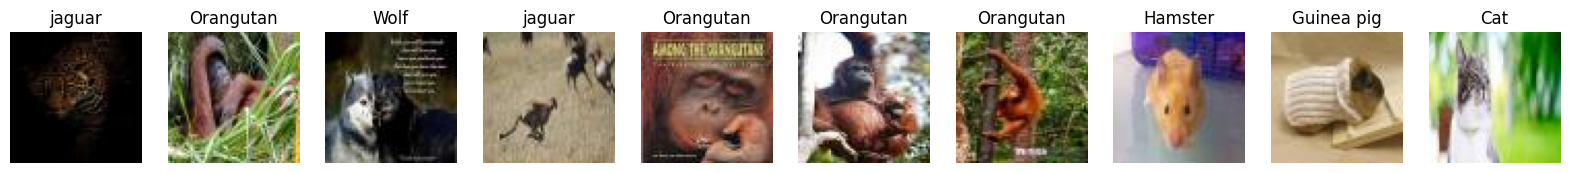

In [7]:
num_image = 10
plt.figure(figsize=(20, 4))
for i in range(num_image):
    idx = np.random.randint(0,len(trainset_animal))
    plt.subplot(1,num_image,i+1)
    plt.imshow(trainset_animal[idx][0])
    plt.title(f"{classesname_animal[trainset_animal[idx][1]]}")
    plt.axis("off")
plt.show()

#### 展示CIFAR-10数据集

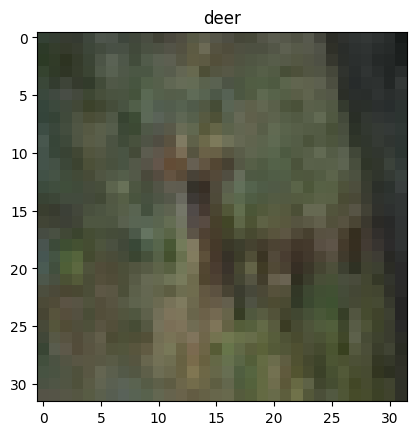

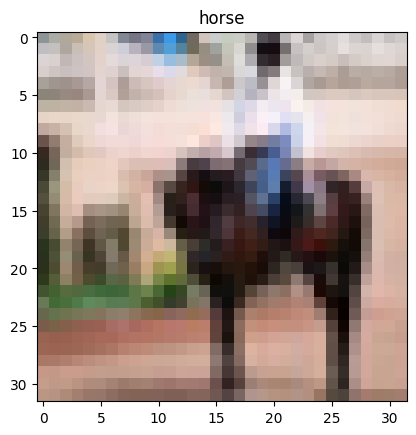

In [8]:
# Function to display images
def imshow(img,img_id,classes):
    image, label = img[img_id]
    npimg = image / 2 + 0.5  # Unnormalize the image
    npimg = np.transpose(npimg, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    plt.imshow(npimg)  # Display the image
    plt.title(classes[label])
    plt.show()

# Display the first image using imshow
# imshow(trainset,2,classes)
for i in range(2):
    imshow(trainset_cifar10,i+10,classesname_cifar10)

#### 加载CIFAR-10数据集噪声

In [9]:
noise_file = torch.load('autodl-tmp/CIFAR-10N/cifar-10-batches-py/CIFAR-10_human.pt')
clean_label = noise_file['clean_label']
worst_label = noise_file['worse_label']
aggre_label = noise_file['aggre_label']
random_label1 = noise_file['random_label1']
random_label2 = noise_file['random_label2']
random_label3 = noise_file['random_label3']

#### 展示CIFAR-100数据集

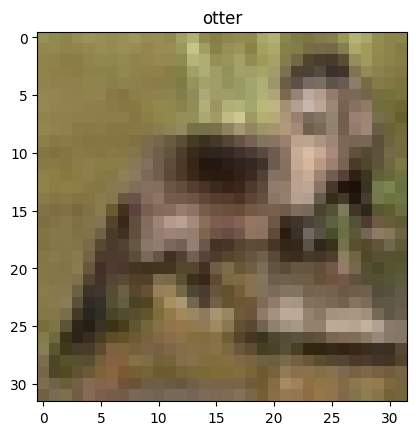

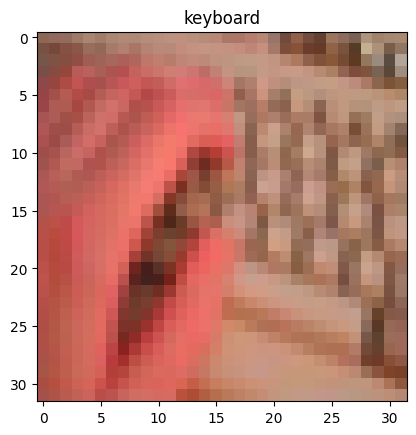

In [10]:
for i in range(2):
    imshow(trainset_cifar100,i+100,classesname_cifar100)

#### 加载CIFAR-100数据集noise

In [11]:
noise_file = torch.load('autodl-tmp/CIFAR-100N/cifar-100-python/CIFAR-100_human.pt')
clean_label = noise_file['clean_label']
noisy_label = noise_file['noisy_label']

#### CIFAR数据集的误差率

In [12]:
def cal_error(trainset, label):
    length = len(trainset)
    cnt = 0
    for i in range(length):
        if trainset[i][1] != label[i]:
            cnt += 1
    return cnt/length

In [13]:
# CIFAR-10 Worst Label
CIFAR_10_WORST_error = cal_error(trainset_cifar10,worst_label)
# CIFAR-10 AggreLabel
CIFAR_10_Aggre_error = cal_error(trainset_cifar10,aggre_label)
# CIFAR-10 random_label1
CIFAR_10_random1_error = cal_error(trainset_cifar10,random_label1)
# CIFAR-10 random_label2
CIFAR_10_random2_error = cal_error(trainset_cifar10,random_label2)
# CIFAR-10 random_label3
CIFAR_10_random3_error = cal_error(trainset_cifar10,random_label3)
# CIFAR-100
CIFAR_100_error = cal_error(trainset_cifar100,noisy_label)

In [14]:
print("CIFAR-10数据集noisylabel情况：\n",
     f"CIFAR_10_WORST_error:{CIFAR_10_WORST_error*100:.2f}%\n",
     f"CIFAR_10_Aggre_error:{CIFAR_10_Aggre_error*100:.2f}%\n",
     f"CIFAR_10_random1_error:{CIFAR_10_random1_error*100:.2f}%\n",
     f"CIFAR_10_random2_error:{CIFAR_10_random2_error*100:.2f}%\n",
     f"CIFAR_10_random3_error:{CIFAR_10_random3_error*100:.2f}%\n",
     f"CIFAR_100_error:{CIFAR_100_error*100:.2f}%\n")

CIFAR-10数据集noisylabel情况：
 CIFAR_10_WORST_error:40.21%
 CIFAR_10_Aggre_error:9.01%
 CIFAR_10_random1_error:17.23%
 CIFAR_10_random2_error:18.12%
 CIFAR_10_random3_error:17.64%
 CIFAR_100_error:40.20%



#### CIFAR数据集的状态偏移

In [24]:
def transMatrix(trainset, label, classLength):
    # 创建 classLength x classLength 的零矩阵
    matrix = np.zeros((classLength, classLength))

    # 填充矩阵
    for i in range(len(trainset)):
        matrix[label[i]][trainset[i][1]] += 1
    
    # 获取矩阵中的最大值和最小值
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    
    # 如果最大值和最小值相等（矩阵没有变化），避免除以零
    if max_val != min_val:
        # 进行最小-最大归一化
        matrix = (matrix - min_val) / (max_val - min_val)
    else:
        # 如果最大值等于最小值，矩阵已经是常数，直接返回零矩阵
        matrix = np.zeros_like(matrix)

    return matrix

def getTrainMatrix(trainset, label, class_names, name):
    classLength = len(class_names)
    matrix = transMatrix(trainset, label, classLength)

    # 绘制矩阵图
    plt.imshow(matrix, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.title(f"{name} visible matrix")

    # 设置坐标轴
    plt.xticks(np.arange(classLength), class_names, rotation=45)
    plt.yticks(np.arange(classLength), class_names)

    # 在矩阵单元格内显示数值
    for i in range(classLength):
        for j in range(classLength):
            plt.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='black')

    # 设置坐标标签并保存
    plt.xlabel("col classes")
    plt.ylabel("row classes")
    plt.savefig(f'pic/{name}_visible_matrix.png', bbox_inches='tight')
    print(f'pic/{name}_visible_matrix.png 保存成功')
    plt.show()

pic/CIFAR-10_Worst_visible_matrix.png 保存成功


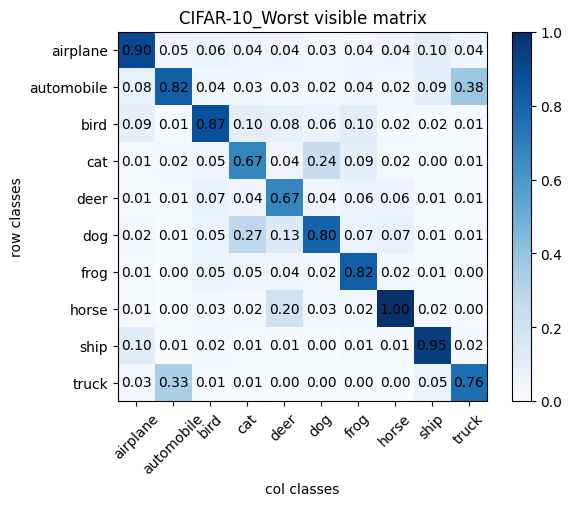

pic/CIFAR-10_Aggre_visible_matrix.png 保存成功


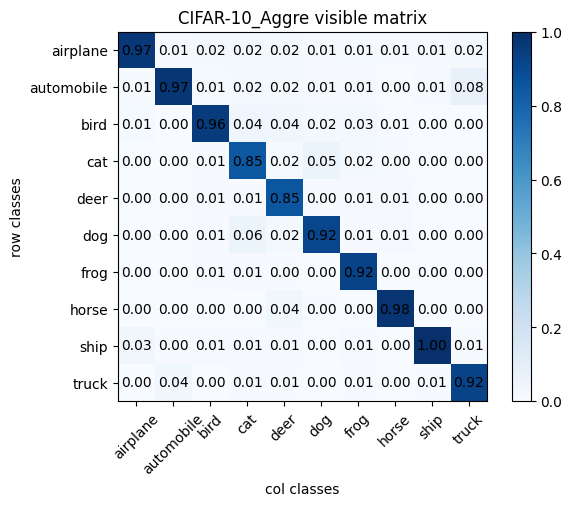

pic/CIFAR-10_Random1_visible_matrix.png 保存成功


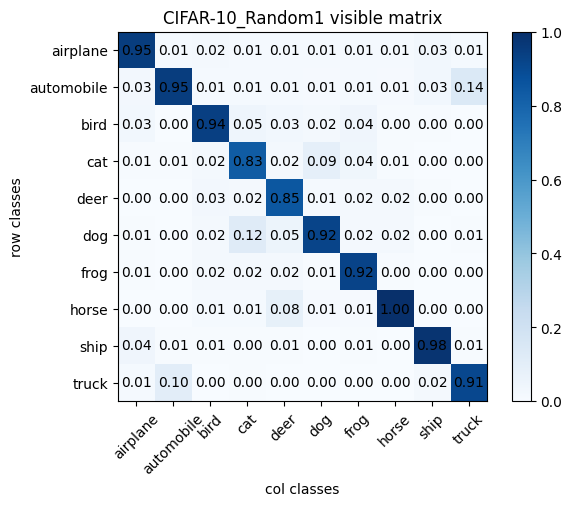

pic/CIFAR-10_Random2_visible_matrix.png 保存成功


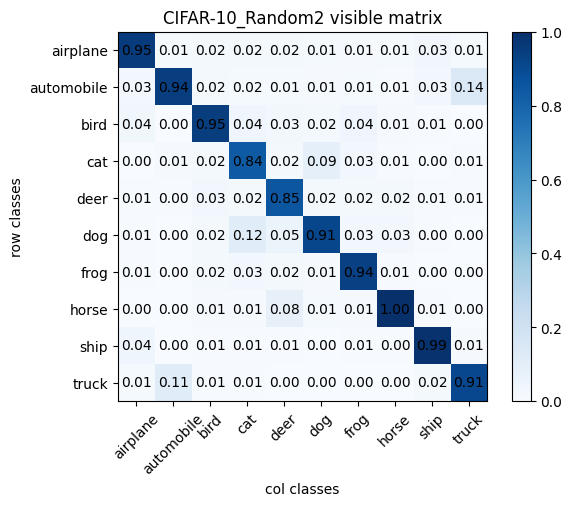

pic/CIFAR-10_Random3_visible_matrix.png 保存成功


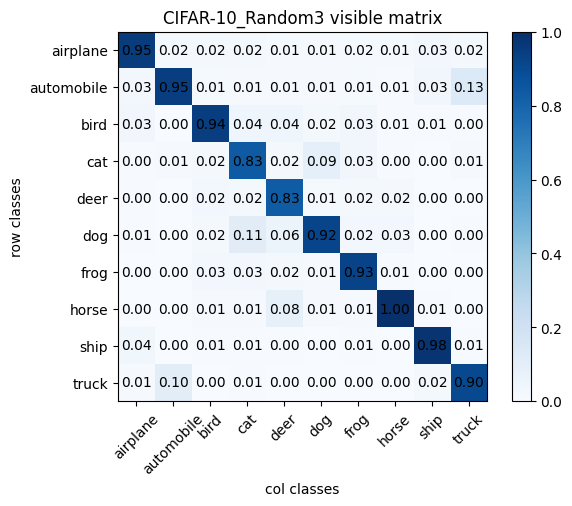

In [27]:
getTrainMatrix(trainset_cifar10,worst_label,classesname_cifar10,'CIFAR-10_Worst')
getTrainMatrix(trainset_cifar10,aggre_label,classesname_cifar10,'CIFAR-10_Aggre')
getTrainMatrix(trainset_cifar10,random_label1,classesname_cifar10,'CIFAR-10_Random1')
getTrainMatrix(trainset_cifar10,random_label2,classesname_cifar10,'CIFAR-10_Random2')
getTrainMatrix(trainset_cifar10,random_label3,classesname_cifar10,'CIFAR-10_Random3')
# getTrainMatrix(trainset_cifar100,noisy_label,classesname_cifar100,'CIFAR-100_noisy')